In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
from skimage.transform import rescale, resize, downscale_local_mean

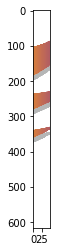

In [2]:
img = io.imread('./1.gif')
plt.imshow(img)
plt.show()

In [3]:
images = []
for image in os.listdir('.'):
    if(image.split('.')[-1] == 'gif'):
        img = io.imread('./' + image)
        img = resize(img, (587, 48), anti_aliasing=True)
        images.append(img)

In [4]:
plt.axis

<function matplotlib.pyplot.axis(*args, **kwargs)>

In [5]:
def rgb2tf(img):
    img2 = np.zeros(img.shape[:-1])
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if np.any(img[x, y, :] - np.array([1, 1, 1, 0])):
                img2[x, y] = 1
            else:
                img2[x, y] = 0
    return img2

In [6]:
n = len(images)
n

35

In [7]:
def show(img):
    plt.imshow(img)
    plt.axis('off')    
    plt.show()


In [8]:
images[0].shape

(587, 48, 4)

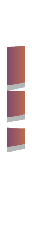

In [9]:
show(images[0])

In [10]:
images[0][335, -1]

array([0.72156863, 0.42745098, 0.32156863, 1.        ])

In [11]:
rgb2tf(images[0])[100, 25]

0.0

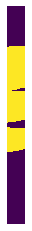

In [12]:
show(rgb2tf(images[0]))

In [13]:
images[0][0, 25, :]

array([1., 1., 1., 0.])

In [14]:
def calc_diff(i, j):
    img1 = np.sum(rgb2tf(images[i])[:, 47] > 0)
    img2 = np.sum(rgb2tf(images[j])[:, 0] > 0)
    return abs(img1 - img2)

In [15]:
eps = 0.01
def calc_diff2(i, j):
    iright = np.array([0., 0., 0.])
    cnt = 0.
    for x in range(images[i].shape[0]):
        color = images[i][x, -1, :-1].reshape((3,))
        if abs(color[0] - 1) > eps:
            if np.max(np.abs(color - np.array([0.78823529, 0.79215686, 0.79215686]))) < eps:
                continue
            iright += color
            cnt += 1.
#     print(iright)
    iright /= cnt
    cnt = 0.
    jleft = np.array([0., 0., 0.])
    for x in range(images[j].shape[0]):
        color = images[j][x, 0, :-1].reshape((3,))
        if abs(color[0] - 1) > eps:
            if np.max(np.abs(color - np.array([0.78823529, 0.79215686, 0.79215686]))) < eps:
                continue
            jleft += color
            cnt += 1.
    jleft /= cnt
#     print(jleft)
    return np.mean(np.abs(iright-jleft))

In [16]:
print(calc_diff2(11, 9))
print(calc_diff2(11, 22))


0.19837383329557212
0.23372910087328205


In [17]:
ans = [11]
vis = np.zeros((n, ))
vis[11] = 1
for i in range(n-1):
    ansj = -1
    minval = 1000000000000
    for j in range(n):
        if(j == ans[i]):
            continue
        elif(vis[j] == 1):
            continue
        else:
            if(ansj == -1):
                minval = calc_diff2(ans[i], j)
                ansj = j
            elif(calc_diff2(ans[i], j) < minval):
                minval = calc_diff2(ans[i], j)
                ansj = j
        print('   ' + str(j))
    ans.append(ansj)
    print(str(ans[i]) + ':' + str(ansj))
    vis[ansj] = 1
ans
        

   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
   10
   12
   13
   14
   15
   16
   17
   18
   19
   20
   21
   22
   23
   24
   25
   26
   27
   28
   29
   30
   31
   32
   33
   34
11:31
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
   10
   12
   13
   14
   15
   16
   17
   18
   19
   20
   21
   22
   23
   24
   25
   26
   27
   28
   29
   30
   32
   33
   34
31:28
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
   10
   12
   13
   14
   15
   16
   17
   18
   19
   20
   21
   22
   23
   24
   25
   26
   27
   29
   30
   32
   33
   34
28:5
   0
   1
   2
   3
   4
   6
   7
   8
   9
   10
   12
   13
   14
   15
   16
   17
   18
   19
   20
   21
   22
   23
   24
   25
   26
   27
   29
   30
   32
   33
   34
5:8
   0
   1
   2
   3
   4
   6
   7
   9
   10
   12
   13
   14
   15
   16
   17
   18
   19
   20
   21
   22
   23
   24
   25
   26
   27
   29
   30
   32
   33
   34
8:9
   0
   1
   2
   3
   4
   6
   7
   10
   12
   13
   14
   

[11,
 31,
 28,
 5,
 8,
 9,
 29,
 21,
 15,
 4,
 30,
 13,
 12,
 2,
 6,
 16,
 17,
 33,
 22,
 26,
 18,
 7,
 19,
 0,
 27,
 25,
 10,
 23,
 1,
 24,
 34,
 32,
 3,
 20,
 14]

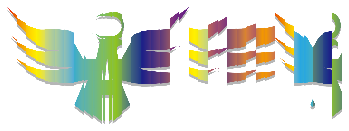

In [18]:
# ans = [11, 9]
big_image = np.copy(images[ans[0]])
for i in range(1, len(ans)):
    big_image = np.concatenate((big_image, images[ans[i]]), axis = 1)
show(big_image)

In [19]:
ans = range(n)

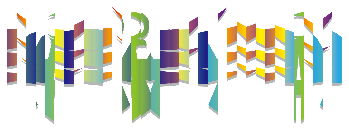

In [20]:
# ans = [11, 9]
big_image = np.copy(images[ans[0]])
for i in range(1, len(ans)):
    big_image = np.concatenate((big_image, images[ans[i]]), axis = 1)
show(big_image)

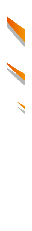

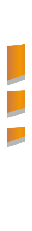

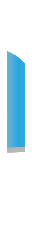

In [21]:
show(images[1])
show(images[10])
show(images[34])

In [22]:
def merge(img1, img2):
    eps = 0.1
    right_most_vector = img1[:, -1, :]
    ansi = -1
    for i in range(img2.shape[1]):
        if(np.max(np.abs(right_most_vector - img2[:, i, :])) < eps):
            ansi = i
            break
    return ansi

In [23]:
# ans = [11, 9]
big_image = np.copy(images[11])
last_id = 11
for i in range(1, n):
    for j in range(n):
        if(j == last_id):
            continue
        anspos = merge(images[last_id], images[j])
        if(anspos != -1):
            big_image = np.concatenate((big_image, images[j][:, anspos+1:, :]), axis = 1)
            last_id = j
            break


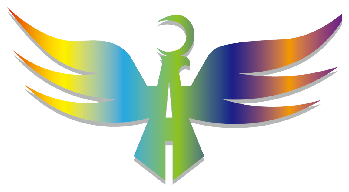

In [24]:
show(big_image)

In [57]:
calc_diff2(19, 10)

33.01176470588263